<a href="https://colab.research.google.com/github/ScientistLim/ProjectAW/blob/feature%2Fdata-augmentation-Lim/time%26Magnitude_Warping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 증강(jittering/time_warping)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 원본 데이터 증강

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files

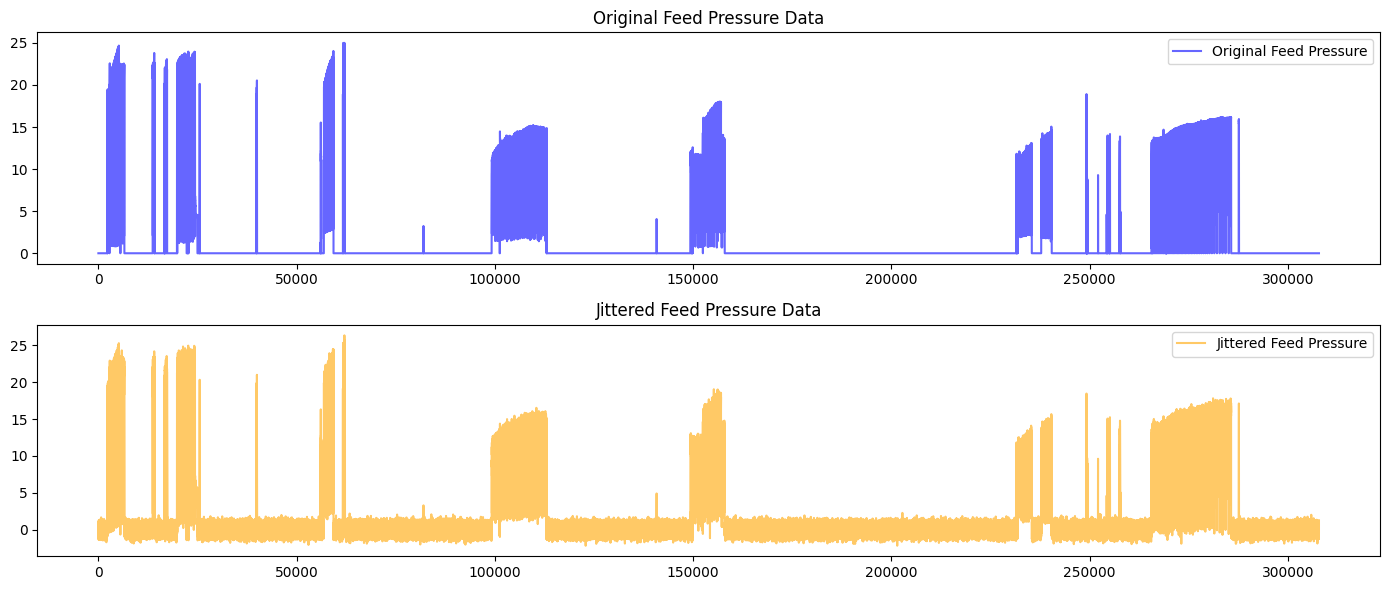

In [15]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/수정된 데이터/시각_유입량_압력.csv'
df = pd.read_csv(file_name)

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['PIT.PIT_03.PV']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# 4. Jittering 적용 함수 정의 (노이즈 추가)
def apply_jittering(df, noise_level=0.01):
    jittered_df = df.copy()
    jittered_df['feed_pressure'] += np.random.normal(0, noise_level, df.shape[0])
    return jittered_df

# Jittering 적용 (노이즈 레벨 설정 가능)
df_jittered = apply_jittering(df, noise_level=0.5)

# 원본 데이터 시각화
plt.figure(figsize=(14, 6))

# 1. 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# 2. Jittered 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_jittered['feed_pressure'], label='Jittered Feed Pressure', color='orange', alpha=0.6)
plt.title('Jittered Feed Pressure Data')
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

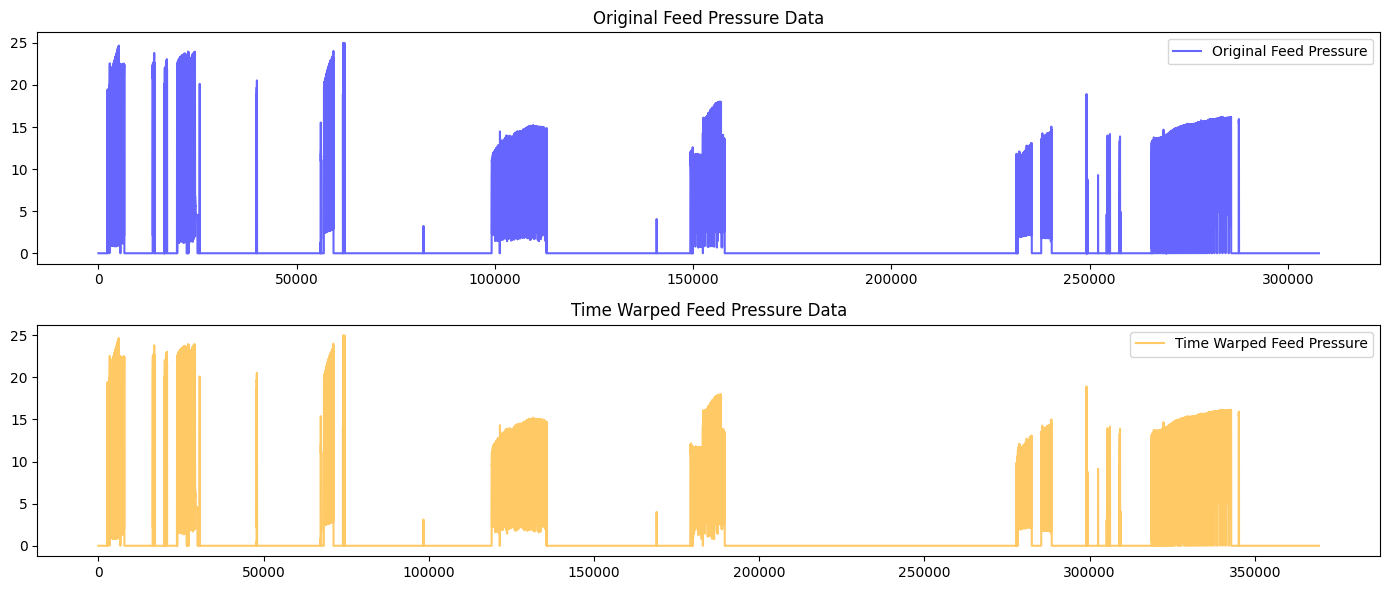

In [19]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/수정된 데이터/시각_유입량_압력.csv'
df = pd.read_csv(file_name)

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['PIT.PIT_03.PV']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=1.5):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Time Warping 적용
df_time_warped = time_warping(df, warp_factor=1.2)

# 원본 데이터와 Time Warping 적용 데이터 시각화
plt.figure(figsize=(14, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# Time Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_warped['feed_pressure'], label='Time Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Time Warped Feed Pressure Data')
plt.legend()

plt.tight_layout()
plt.show()

## 수정된 데이터 증강

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from scipy.interpolate import interp1d

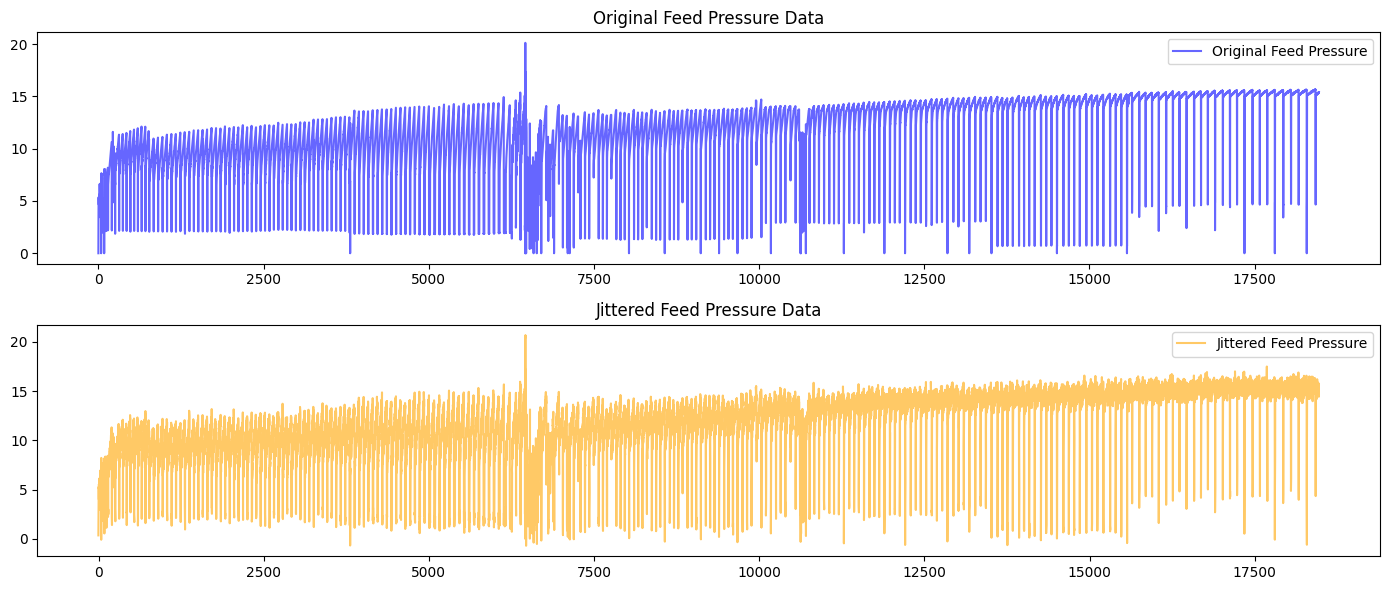

In [14]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/전처리 데이터/pressure_data.csv'
df = pd.read_csv(file_name)

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['feed pressure']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Jittering 적용 함수 정의 (노이즈 추가 및 시간 이동)
def apply_jittering(df, noise_level=0.01, time_shift=1):
    jittered_df = df.copy()
    jittered_df['feed_pressure'] += np.random.normal(0, noise_level, df.shape[0])  # 노이즈 추가
    jittered_df.index = jittered_df.index + np.random.randint(-time_shift, time_shift, size=df.shape[0])  # 시간 이동
    return jittered_df

# Jittering 적용 (노이즈 레벨 설정 가능)
df_jittered = apply_jittering(df, noise_level=0.5, time_shift=2)

# 원본 데이터 시각화
plt.figure(figsize=(14, 6))

# 1. 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# 2. Jittered 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_jittered['feed_pressure'], label='Jittered Feed Pressure', color='orange', alpha=0.6)
plt.title('Jittered Feed Pressure Data')
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

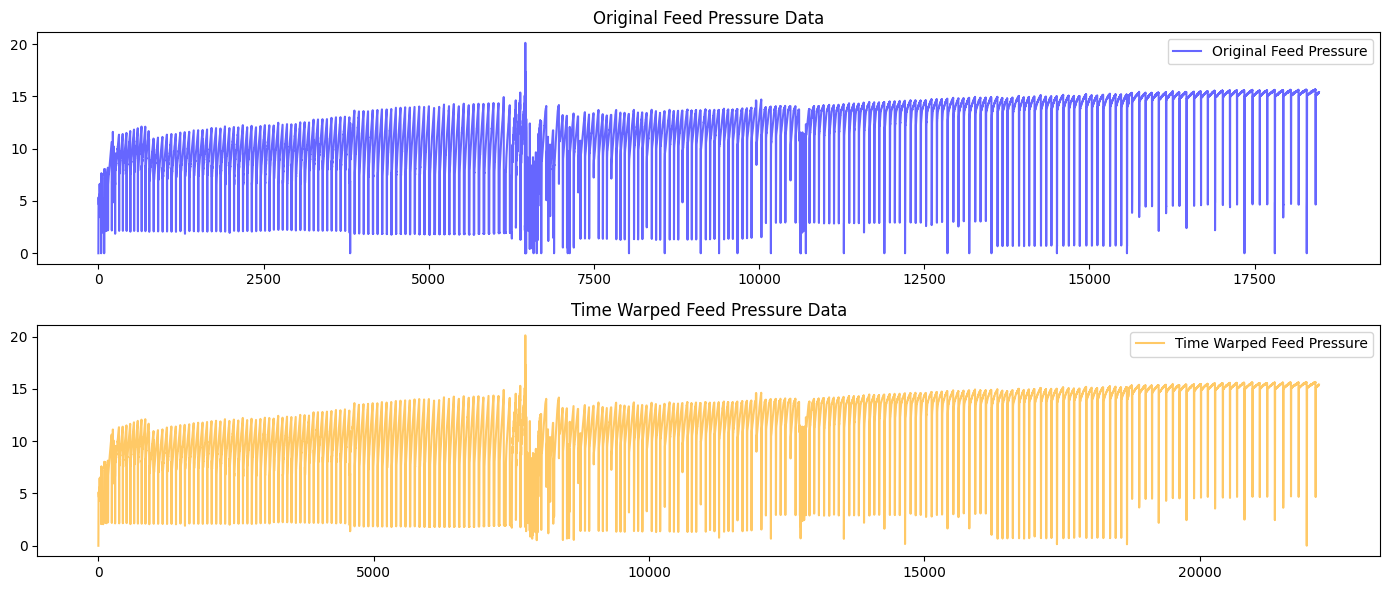

In [13]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/전처리 데이터/pressure_data.csv'
df = pd.read_csv(file_name)

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['feed pressure']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=1.5):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Time Warping 적용
df_time_warped = time_warping(df, warp_factor=1.2)

# 원본 데이터와 Time Warping 적용 데이터 시각화
plt.figure(figsize=(14, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# Time Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_warped['feed_pressure'], label='Time Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Time Warped Feed Pressure Data')
plt.legend()

plt.tight_layout()
plt.show()

## 최신 데이터 증강

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from scipy.interpolate import interp1d

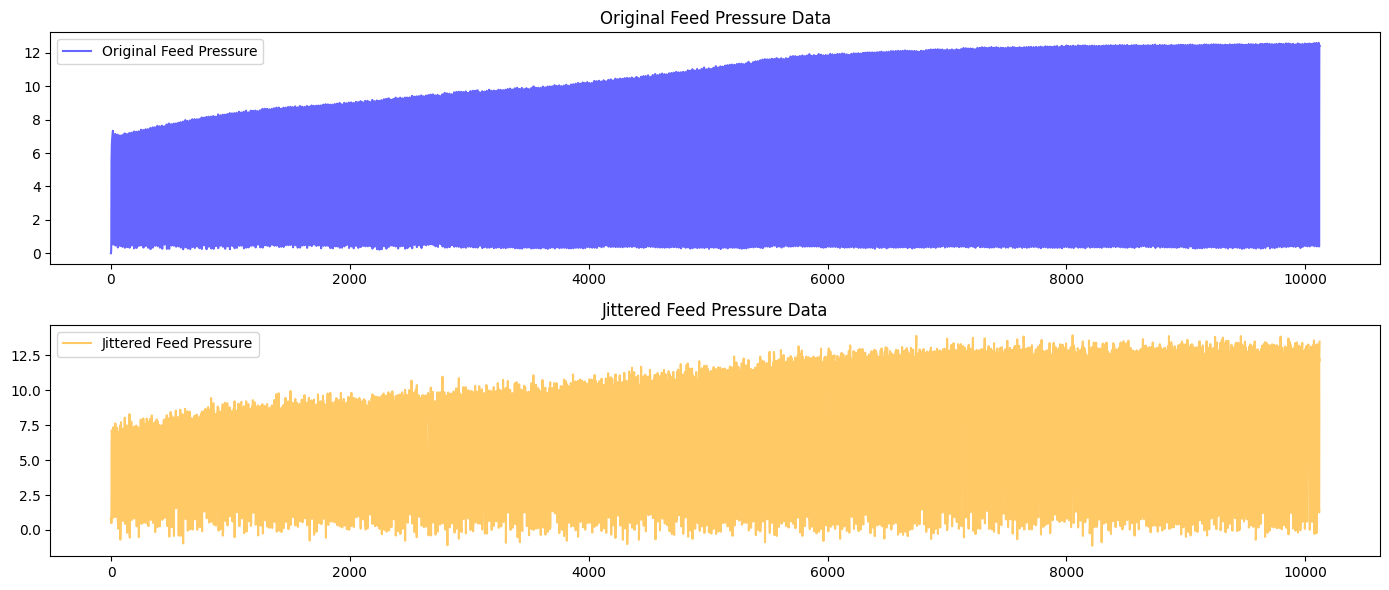

In [29]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Jittering 적용 함수 정의 (노이즈 추가 및 시간 이동)
def apply_jittering(df, noise_level=0.01, time_shift=1):
    jittered_df = df.copy()
    jittered_df['feed_pressure'] += np.random.normal(0, noise_level, df.shape[0])  # 노이즈 추가
    jittered_df.index = jittered_df.index + np.random.randint(-time_shift, time_shift, size=df.shape[0])  # 시간 이동
    return jittered_df

# Jittering 적용 (노이즈 레벨 설정 가능)
df_jittered = apply_jittering(df, noise_level=0.5, time_shift=2)

# 원본 데이터 시각화
plt.figure(figsize=(14, 6))

# 1. 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# 2. Jittered 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_jittered['feed_pressure'], label='Jittered Feed Pressure', color='orange', alpha=0.6)
plt.title('Jittered Feed Pressure Data')
plt.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

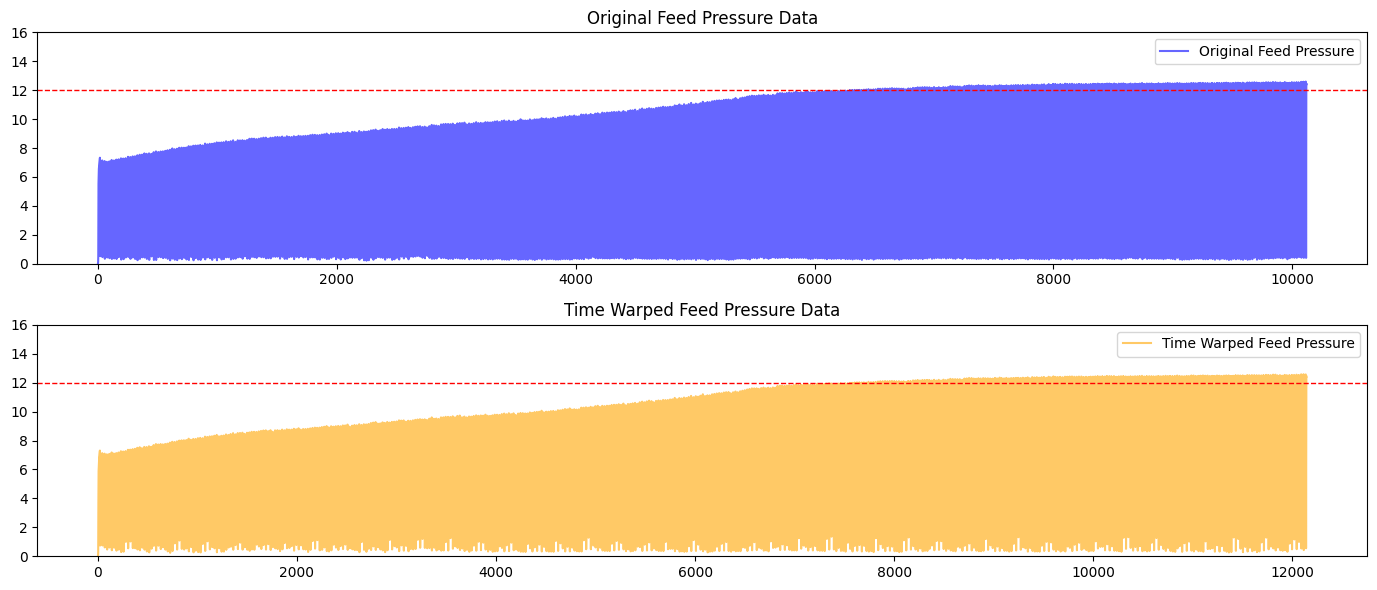

In [37]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=1.5):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Time Warping 적용
df_time_warped = time_warping(df, warp_factor=1.2)

# 원본 데이터와 Time Warping 적용 데이터 시각화
plt.figure(figsize=(14, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_warped['feed_pressure'], label='Time Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Time Warped Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

plt.tight_layout()
plt.show()

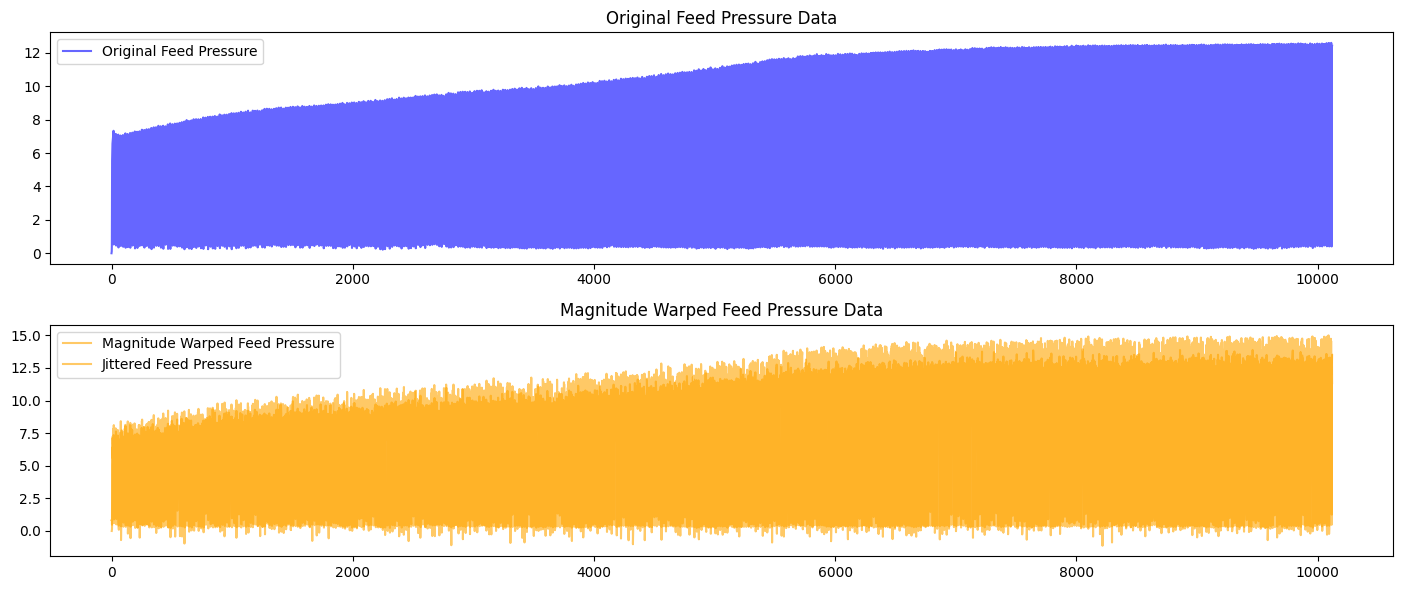

In [38]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'PIT.PIT_03.PV' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor
    return warped_df

# Magnitude Warping 적용
df_magnitude_warped = magnitude_warping(df)

# 원본 데이터와 Magnitude Warping 적용 데이터 시각화
plt.figure(figsize=(14, 6))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.legend()

# Magnitude Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_magnitude_warped['feed_pressure'], label='Magnitude Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Magnitude Warped Feed Pressure Data')
plt.plot(df_jittered['feed_pressure'], label='Jittered Feed Pressure', color='orange', alpha=0.6)
plt.legend()

plt.tight_layout()
plt.show()

## Time Warping와 Magnitude를 적용해보자

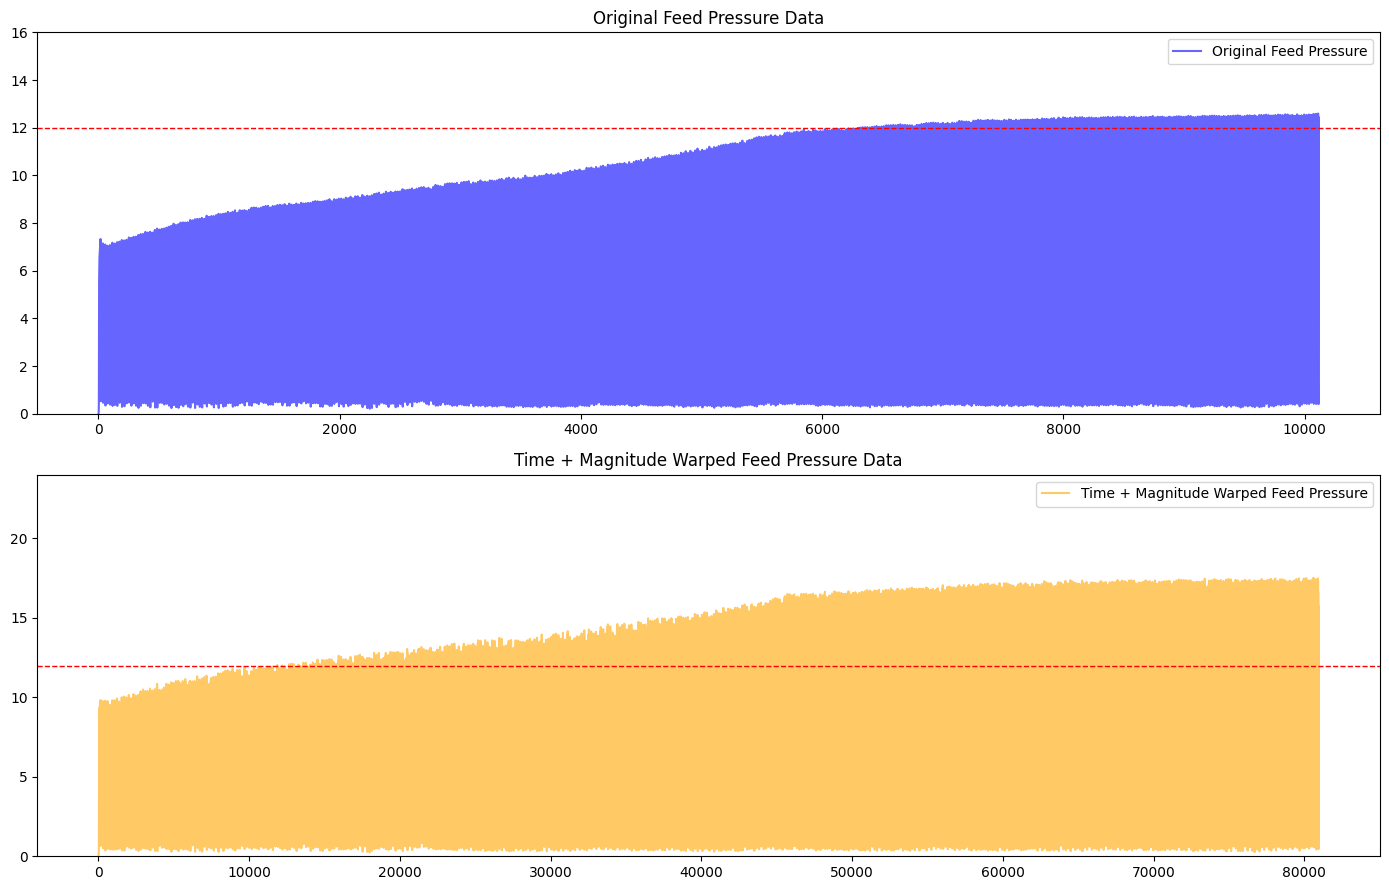

In [51]:
# 1. 시각화를 위한 설정
%matplotlib inline

# 2. CSV 파일에서 데이터 로드
file_name = '/content/drive/MyDrive/종설프1_5팀/최신_데이터/통합운전데이터.rev01.csv'
df = pd.read_csv(file_name, encoding='CP949')

# 3. 압력 변수 'RO유입 압력(bar)' 열 선택 (압력 변수만 사용)
df = df[['RO유입 압력(bar)']]
df.columns = ['feed_pressure']  # 열 이름을 사용하기 쉽게 변경

# Time Warping 적용 함수 정의
def time_warping(df, warp_factor=2.0):
    original_index = np.arange(df.shape[0])
    warped_index = np.linspace(0, df.shape[0]-1, int(df.shape[0] * warp_factor))

    interpolated_feed_pressure = interp1d(original_index, df['feed_pressure'], kind='linear', fill_value="extrapolate")(warped_index)

    # Time Warping 결과를 새로운 데이터프레임으로 반환
    warped_df = pd.DataFrame(interpolated_feed_pressure, columns=['feed_pressure'])
    return warped_df

# Magnitude Warping 적용 함수 정의
def magnitude_warping(df, factor_range=(0.8, 1.2)):
    factor = np.random.uniform(factor_range[0], factor_range[1], df.shape[0])
    warped_df = df.copy()
    warped_df['feed_pressure'] *= factor  # 각 구간마다 진폭 변형
    return warped_df

# Time Warping과 Magnitude Warping을 함께 적용하는 함수 정의
def time_and_magnitude_warping(df, warp_factor=1.2, factor_range=(1.0, 1.3)):
    # Step 1: Time Warping 적용
    df_time_warped = time_warping(df, warp_factor=warp_factor)

    # Step 2: Magnitude Warping 적용
    df_time_magnitude_warped = magnitude_warping(df_time_warped, factor_range=factor_range)

    return df_time_magnitude_warped

# Time + Magnitude Warping 적용
df_time_magnitude_warped = time_and_magnitude_warping(df, warp_factor=8.0, factor_range=(1.0, 1.4))

# 원본 데이터와 Time + Magnitude Warping 적용 데이터 시각화
plt.figure(figsize=(14, 9))

# 원본 데이터 그래프
plt.subplot(2, 1, 1)
plt.plot(df['feed_pressure'], label='Original Feed Pressure', color='blue', alpha=0.6)
plt.title('Original Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 16)

# Time + Magnitude Warping 적용 데이터 그래프
plt.subplot(2, 1, 2)
plt.plot(df_time_magnitude_warped['feed_pressure'], label='Time + Magnitude Warped Feed Pressure', color='orange', alpha=0.6)
plt.title('Time + Magnitude Warped Feed Pressure Data')
plt.axhline(y=12, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.ylim(0, 24)

plt.tight_layout()
plt.show()